# Main Histogram Running Tests Platform
## Test 4

In [1]:
import sys

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

import time
import numpy as np
from data_science.analysis_methodology import HistogramConsistencyTest
from data_science import CompareData
from data_science.preprocessing_data.Metrics_calculation import *
import matplotlib.pyplot as plt
from Histogram_results_plotfunction import plot, recorded_ratio

Using TensorFlow backend.


Time Insertion

In [2]:
t0 = time.time()

Load data test
Call the histogram program and plot analisys

Nominal rotation of 4500 rpm

Filter type (frequency harmonic filters), can be changed to Wavelets or None

P-value Limit threshold defined to 10%, can be changed  0.1 to 100%

Number of Bias of the Histogram defined in 20, can be changed 1 to inf.

Rotation speed rotation estimation defined to zero (none), can be changed by any number in rpm  

In [3]:

num_test = 4

data = np.load("Arquivos_CSV_offical3_" + str(num_test) + "_1.npy")

dt = 0.0002546  # Without Downsampling

step = 1 #Add downsampling (where 1 == None downsampling)
hct = HistogramConsistencyTest(
  nominal_rotation=75, filter_type="frequency", p_value_limit=0.1, n_bias=20,
  rotational_speed_estimation=0
)

Reading 4 sensors that is the four initial coloumns 

Slice_Size = 7856 dots (Resolution can be changed)

In [4]:

test4 = CompareData(data[::step,:4], dt*step, hct, slice_size=int(7856/step))


Number of samples: 288
0 of 288 samples analyzed...
100 of 288 samples analyzed...
200 of 288 samples analyzed...
288 of 288 samples analyzed!


Plot signal from  Test 4

According to graphic:

Fist box = Raw signal in blue

Second box = Variations in green, where can find anomalous signal (targets) 

Third box = Recorded or not datas in red (divided into packages of 7856 dots each)

Fourth box = P-value from each package results in yellow, Trheshold in purple (adpoted p-value limit)  

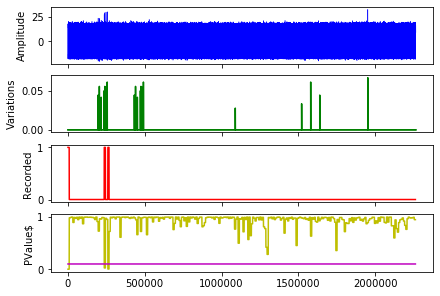

Time spent = 15.42434310913086


In [5]:
plot(test4, n_sensors_plot=1, target=data[::step,[10, 11]])

print("Time spent = " + str(time.time() - t0))


F1Score Metrics from Test 04:

In [6]:
print(test4.get_evaluation_metrics(target=data[::step,[10]]))

{'tn': 279, 'fp': 2, 'fn': 6, 'tp': 1, 'accuracy_score': 0.9722222222222222, 'recall_score': 0.14285714285714285, 'precision_score': 0.3333333333333333, 'f1_score': 0.2}


Recorded Ratio (%) from Test 04:

In [7]:
print("Recorded ratio = ", recorded_ratio(test4))
a = np.array(test4.record)    

Recorded ratio =  1.0416666666666667
